<a href="https://colab.research.google.com/github/lucasv-1/lucasv-1/blob/main/C%C3%B3pia_de_ket_wcq2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução à Programação Quântica com Ket

VII Workshop de Computação Quântica — UFSC

[slides](https://drive.google.com/file/d/1lHL-HO6Jm6L1C7niz8QQtNEZ6Yrf7wQw/view?usp=sharing)

In [1]:
!pip install ket-lang[full]==0.8.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━

In [2]:
# Importa as constantes matemáticas e funções necessárias
from math import pi, sqrt
from scipy.optimize import minimize
from IPython.display import display
import plotly.express as px

# Importa a plataforma de programação Quântica Ket
from ket import *
from ket import lib
from ket import ket_version

# Imprime a versão do Ket usada
print("\n".join(ket_version()))
!python --version

Ket v0.8.0
libket v0.5.0 [rustc 1.82.0 (f6e511eec 2024-10-15) x86_64-unknown-linux-gnu]
kbw v0.3.0 [rustc 1.82.0 (f6e511eec 2024-10-15) x86_64-unknown-linux-gnu]
Python 3.10.12


# Processo Quântico

Toda operação quântica está vinculada a um **processo**. Para o programador, o processo é usado principalmente como uma **fonte para a alocação de qubits**. Um processo também pode ser pensado como o ambiente ou o contexto em que as operações quânticas são executadas.

Cada processo está ligado a uma execução quântica independente e **não se comunica com outros processos** diretamente. Isso significa que os dados ou estados quânticos dentro de um processo são isolados dos dados em outros processos, a menos que você tome medidas explícitas para interagir entre eles (o que exigir técnicas específicas).

O **processo no Ket** é responsável por gerenciar toda a execução quântica, desde a alocação de qubits até o controle de operações. Ele também pode ser configurado para diferentes **alvos de execução**, como simuladores locais ou computadores quânticos reais. Posteriormente, veremos como modificar o alvo de execução de um processo.

# Alocando 1 Qubit

A primeira coisa que faremos é **alocar um bit quântico** (ou "qubit") de um processo quântico no Ket.

In [3]:
# Criação de um novo processo quântico no Ket
process = Process()

# Alocação de um qubit do processo
qubit = process.alloc()

# Visualiza o estado do qubit na esfera de Bloch,
# que representa o estado quântico em um espaço tridimensional.
dump(qubit).sphere().show()

# Mostra uma representação matemática do estado quântico atual
# do qubit, incluindo suas amplitudes e fases.
dump(qubit).show(mode="latex")

<IPython.core.display.Math object>

# Manipulando o Qubit

Para alterar o estado de um qubit, é necessário usar **portas lógicas quânticas**. Essas portas aplicam transformações ao estado quântico do qubit. O Ket oferece um conjunto completo de portas quânticas que possibilitam a implementação de qualquer operação quântica.

Você pode encontrar uma lista completa de portas disponíveis na [documentação do Ket](https://quantumket.org/ket/api/ket.gates.html).

No exemplo abaixo, aplicamos a porta **Hadamard** (`H`) ao qubit. Essa porta coloca o qubit em um estado de **superposição**, o que significa que ele tem uma probabilidade igual de estar nos estados $\left|0\right>$ ou $\left|1\right>$ quando medido.



In [4]:
# Criação de um novo processo quântico no Ket
process = Process()

# Alocação de um qubit do processo
qubit = process.alloc()

#####
# Aplicação de uma porta quântica ao qubit
# A porta Hadamard (H) é usada para colocar o qubit em superposição.
#####
H(qubit)

# Visualiza o estado do qubit na esfera de Bloch após a aplicação da porta Hadamard
dump(qubit).sphere().show()

# Mostra uma representação detalhada do estado quântico atual do qubit
dump(qubit).show(mode="latex")

<IPython.core.display.Math object>

## Exercício: Testando Outras Portas de 1 Qubit

Explore o efeito de diferentes portas quânticas sobre um qubit.

1. Altere o código abaixo substituindo a porta Hadamard por outra de sua escolha (ex: Pauli-X, Pauli-Z).
2. Aplique duas ou mais portas em sequência.
3. Visualize o resultado na esfera de Bloch e na representação matemática.

In [7]:
# Criação de um novo processo quântico no Ket
process = Process()

# Alocação de um qubit do processo
qubit = process.alloc()

# #####
# Coloque a porta quântica aqui (ex: H(qubit), X(qubit), Z(qubit))
# #####

# Exemplo: H(qubit)  # Aplique a porta que você escolher aqui
# Exemplo: X(qubit)  # Aplique uma segunda porta aqui
X(qubit)

# Visualiza o estado do qubit na esfera de Bloch
dump(qubit).sphere().show()

# Mostra uma representação detalhada do estado quântico do qubit
dump(qubit).show(mode="latex")

<IPython.core.display.Math object>

## Portas de Rotação

As portas de rotação permitem realizar rotações arbitrárias nos estados dos qubits. As principais portas de rotação são:

- `RX(θ)`: Realiza uma rotação em torno do eixo X da esfera de Bloch.
- `RY(θ)`: Realiza uma rotação em torno do eixo Y da esfera de Bloch.
- `RZ(θ)`: Realiza uma rotação em torno do eixo Z da esfera de Bloch.

In [5]:
process = Process()
qubit = process.alloc()

# Aplicação das portas de rotação ao qubit
# RX: Rotação em torno do eixo X da esfera de Bloch com um ângulo de π/3 radianos.
RX(pi / 3, qubit)

# RY: Rotação em torno do eixo Y da esfera de Bloch com um ângulo de -π/5 radianos.
RY(-pi / 5, qubit)

# RZ: Rotação em torno do eixo Z da esfera de Bloch com um ângulo de π/3 radianos.
RZ(pi / 3, qubit)

dump(qubit).sphere().show()
dump(qubit).show(mode="latex")

<IPython.core.display.Math object>

# Portas de 2 Qubits

O Ket oferece diversas portas de 2 qubits, todas construídas a partir das seguintes portas fundamentais:

- Pauli X — `X`:
  $$
  \begin{matrix}
  X\left|0\right> = & \left|1\right> \\
  X\left|1\right> = & \left|0\right>
  \end{matrix}
  $$
- Pauli Y — `Y`:
  $$
  \begin{matrix}
  Y\left|0\right> = & i\left|1\right> \\
  Y\left|1\right> = & -i\left|0\right>
  \end{matrix}
  $$
- Pauli Z — `Z`:
  $$
  \begin{matrix}
  Z\left|0\right> = & \left|0\right> \\
  Z\left|1\right> = & -\left|1\right>
  \end{matrix}
  $$
- Porta Hadamard — `H`:
  $$
  \begin{matrix}
  H\left|0\right> = & \frac{1}{\sqrt{2}}\left(\left|0\right> + \left|1\right>\right) \\
  H\left|1\right> = & \frac{1}{\sqrt{2}}\left(\left|0\right> - \left|1\right>\right)
  \end{matrix}
  $$
- Pauli de Fase — `PHASE(ϑ)`:
  $$
  \begin{matrix}
  P\left|0\right> = & \left|0\right> \\
  P\left|1\right> = & e^{i\theta}\left|1\right>
  \end{matrix}
  $$
- Rotação em X — `RX(θ)`:
  $$
  \begin{matrix}
  R_x\left|0\right> = & \cos(\theta/2)\left|0\right> - i\sin(\theta/2)\left|1\right> \\
  R_x\left|1\right> = & -i\sin(\theta/2)\left|0\right> + \cos(\theta/2)\left|1\right>
  \end{matrix}
  $$
- Rotação em Y — `RY(θ)`:
  $$
  \begin{matrix}
  R_y\left|0\right> = & \cos(\theta/2)\left|0\right> + \sin(\theta/2)\left|1\right> \\
  R_y\left|1\right> = & -\sin(\theta/2)\left|0\right> + \cos(\theta/2)\left|1\right>
  \end{matrix}
  $$
- Rotação em Z — `RZ(θ)`:
  $$
  \begin{matrix}
  R_z\left|0\right> = & e^{-i\theta/2}\left|0\right> \\
  R_z\left|1\right> = & e^{i\theta/2}\left|1\right>
  \end{matrix}
  $$


## Porta CNOT

Para gerar **entrelaçamento** e realizar qualquer computação significativa, é necessário usar portas que atuem em mais de um qubit. A mais comum delas é a porta CNOT (Controlled NOT).

A porta CNOT opera em dois qubits: um qubit de controle e um qubit alvo.
- Se o qubit de controle estiver no estado $\left|1\right>$, a porta CNOT inverte o estado do qubit alvo.
- Caso contrário, o estado do qubit alvo permanece inalterado.

Esse comportamento é fundamental para criar estados entrelaçados, como os estados de Bell, que são essenciais em muitas aplicações de computação quântica e em protocolos de criptografia quântica.


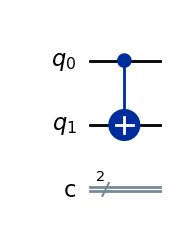

In [8]:
# Desenha o circuito da porta CNOT
lib.draw(CNOT, num_qubits=(1, 1), output="mpl")

## Estado de Bell

O estado de Bell é formado por 2 qubits, portanto, precisamos alocar dois qubits no processo quântico. O método `alloc(n)` aceita um inteiro `n` para indicar quantos qubits devem ser alocados. Os qubits são retornados em um objeto do tipo `Quant`, que representa uma lista de qubits.

Toda informação quântica no Ket é "armazenada" em instâncias de `Quant`, o que significa que toda operação quântica é realizada sobre objetos desse tipo.


In [9]:
# Criação de um novo processo quântico no Ket
process = Process()

# Alocação de 2 qubits dentro do processo
qubits = process.alloc(2)

# Aplicação da porta Hadamard ao primeiro qubit
# Isso coloca o primeiro qubit em um estado superposto.
H(qubits[0])

# Aplicação da porta CNOT (Controlled NOT) onde o primeiro qubit é o controle
# e o segundo qubit é o alvo, criando entrelaçamento entre os qubits.
CNOT(qubits[0], qubits[1])

# Visualiza a distribuição dos estados dos qubits em um histograma
dump(qubits).histogram().show()

# Mostra uma representação detalhada do estado quântico dos qubits
dump(qubits).show(mode="latex")

<IPython.core.display.Math object>

Usando a representação da esfera de Bloch, é possível visualizar o estado de um único qubit. No entanto, para múltiplos qubits, a visualização através da esfera de Bloch não é prática. Nesse caso, podemos utilizar a **visualização de histograma**. O histograma representa a distribuição dos estados dos qubits e permite observar as probabilidades de cada estado ao realizar medições no sistema quântico.

## Construindo a Porta CNOT

A porta CNOT pode ser construída a partir da porta Pauli X, utilizando uma chamada controlada.

No código abaixo, definimos uma função chamada `minha_cnot` que aceita um `Quant` com dois qubits. Dentro da função, usamos a construção `with control(qubits[0])` para definir o primeiro qubit como o qubit de controle. Isso significa que, se o estado do qubit de controle for $ \left|1\right> $, a porta Pauli X será aplicada ao segundo qubit, invertendo seu estado.

Essa abordagem demonstra como podemos construir portas quânticas complexas a partir de portas mais simples, aproveitando o poder das operações controladas.

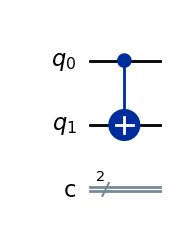

In [10]:
# Definindo uma função para a porta CNOT
def minha_cnot(qubits):
    # Define o primeiro qubit como qubit de controle
    with control(qubits[0]):
        # Aplica a porta Pauli X ao segundo qubit se o controle estiver em |1⟩
        X(qubits[1])


# Desenha o circuito da porta CNOT
lib.draw(minha_cnot, num_qubits=2, output="mpl")

In [11]:
process = Process()
qubits = process.alloc(2)

H(qubits[0])

# Aplicação da porta CNOT construída anteriormente
minha_cnot(qubits)

dump(qubits).show(mode="latex")

<IPython.core.display.Math object>

## Porta Controlada com `ctrl`

A função `ctrl` permite adicionar qubits de controle diretamente na chamada da porta. Isso simplifica a aplicação de operações quânticas controladas, tornando o código conciso.

Por exemplo, no código abaixo, aplicamos a porta Pauli X ao segundo qubit, utilizando o primeiro qubit como controle:


In [12]:
process = Process()
qubits = process.alloc(2)

H(qubits[0])

# Aplicação da porta Pauli X ao segundo qubit, controlada pelo primeiro qubit
ctrl(qubits[0], X)(qubits[1])  # Aplica X ao qubit 1 se o qubit 0 estiver em |1⟩

dump(qubits).show(mode="latex")

<IPython.core.display.Math object>

# Qualquer Função Pode Ser uma Porta Quântica

No Ket, é possível criar novas portas quânticas a partir da aplicação sequencial de outras portas já existentes. Isso permite a construção de operações quânticas complexas a partir da combinação de portas simples.



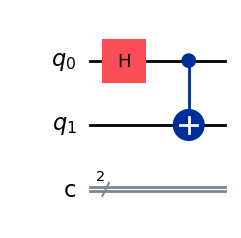

In [13]:
# Definindo uma função para criar um estado de Bell
def bell(a, b):
    # Aplica a porta Hadamard ao qubit 'a'
    H(a)
    # Aplica a porta CNOT, onde 'a' é o controle e 'b' é o alvo
    CNOT(a, b)


# Desenha o circuito da porta de 'bell'
lib.draw(bell, num_qubits=(1, 1), output="mpl")

In [14]:
process = Process()
qubits = process.alloc(2)

# Criação do estado de Bell usando a função definida anteriormente
bell(qubits[0], qubits[1])

dump(qubits).histogram().show()
dump(qubits).show(mode="latex")

<IPython.core.display.Math object>

In [15]:
process = Process()

# Alocação de 3 qubits dentro do processo
qubits = process.alloc(3)

# Aplicação da porta Hadamard ao primeiro qubit
H(qubits[0])

# Aplicação da função bell controlada pelo primeiro qubit
# Cria um estado de Bell entre qubits 1 e 2 se qubit 0 estiver em |1⟩
ctrl(qubits[0], bell)(qubits[1], qubits[2])

dump(qubits).histogram().show()
dump(qubits).show(mode="latex")

<IPython.core.display.Math object>

# Manipulação de Portas Quânticas

No Ket, é possível manipular portas quânticas de várias maneiras, permitindo a criação de circuitos quânticos flexíveis. As principais operações disponíveis incluem a concatenação de portas e a realização do produto tensorial entre elas.

1. **Concatenação de Portas**: Você pode encadear operações quânticas aplicando uma porta após a outra. Isso é útil para construir sequências de operações que atuam em qubits. A ordem das portas é importante, pois o resultado final depende da sequência em que as operações são aplicadas.

2. **Produto Tensorial**: O produto tensorial permite combinar portas quânticas que atuam em qubits diferentes. Essa operação é fundamental para criar circuitos que operam em múltiplos qubits de forma independente.

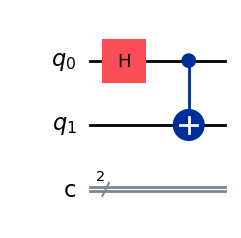

In [16]:
# Criação da porta Bell usando a concatenação de operações
# H aplicada ao qubit 'a' e CNOT controlada por 'a' e alvo 'b'
bell_2 = cat(kron(H, I), CNOT)

lib.draw(bell_2, num_qubits=(1, 1), output="mpl")

In [17]:
process = Process()

# Alocação de 2 qubits dentro do processo
a, b = process.alloc(2)

# Aplicação da porta Bell nos qubits alocados
bell_2(a, b)


dump(a + b).histogram().show()
dump(a + b).show(mode="latex")

<IPython.core.display.Math object>

# Adicionando Fase Global

Nem toda porta controlada com um qubit alvo pode ser construída diretamente a partir das chamadas controladas de portas básicas disponíveis no Ket. A razão para isso está relacionada à fase global. Por exemplo, considere a porta $\sqrt{X}$:

$$
\sqrt{X}\left|0\right> = \frac{1}{2} \left((1+i)\left|0\right> + (1-i)\left|1\right>\right)
$$
$$
\sqrt{X}\left|1\right> = \frac{1}{2} \left((1-i)\left|0\right> + (1+i)\left|1\right>\right)
$$

Ela pode ser equivalente à porta de rotação $R_X(\pi/2)$, já que ambas alteram o estado do qubit de maneira semelhante em termos de fase global. No entanto, uma diferença significativa surge quando essas portas são chamadas de forma controlada. A fase global que antes era irrelevante no contexto de um único qubit se torna uma fase relativa quando se lida com qubits de controle, o que pode impactar o comportamento quântico.

Embora possamos representar a porta $\sqrt{X}$ como $R_X(\pi/2)$ para um qubit:
$$
\underbrace{\frac{1}{\sqrt{2}} \begin{bmatrix} 1 & -i \\ -i & 1 \end{bmatrix}}_{R_X(\pi/2)} \times \underbrace{ e^{i\tfrac{\pi}{4}}}_{\text{Fase Global}} = \frac{1}{2} \begin{bmatrix} 1+i & 1-i \\ 1-i & 1+i \end{bmatrix} = \sqrt{X}
$$
Quando consideramos a versão controlada de $R_X(\pi/2)$, a fase global muda o comportamento em um sistema com dois qubits:

$$
\underbrace{\frac{1}{\sqrt{2}} \begin{bmatrix} \sqrt{2} & 0 & 0 & 0 \\ 0 & \sqrt{2} & 0 & 0 \\ 0 & 0 & 1 & -i \\ 0 & 0 & -i & 1 \end{bmatrix}}_{CR_X(\pi/2)} \times \underbrace{ e^{i\tfrac{\pi}{4}}}_{\text{Fase Global}} \not= \frac{1}{2} \begin{bmatrix} 2 & 0 & 0 & 0 \\ 0 & 2 & 0 & 0 \\ 0 & 0 & 1+i & 1-i \\ 0 & 0 & 1-i & 1+i \end{bmatrix} = C\sqrt{X}
$$

Portanto, para implementar a porta $C\sqrt{X}$ corretamente, precisamos garantir que a fase global seja aplicada corretamente. Felizmente, o Ket oferece suporte para adicionar fases globais às portas quânticas de forma explícita, o que permite que implementemos a porta $\sqrt{X}$ e suas versões controladas corretamente.

No Ket, podemos adicionar uma fase global a uma porta quântica usando o decorador `@global_phase`. Isso nos permite construir portas como `SX` $= \sqrt{X}$ de maneira consistente com suas definições matemáticas.

[[0.70710678+0.j         0.        -0.70710678j]
 [0.        -0.70710678j 0.70710678+0.j        ]]


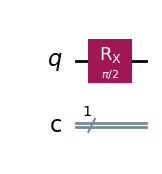

In [18]:
import numpy as np


# Definindo a porta SX como RX(pi/2) com uma fase global de pi/4
@global_phase(pi / 4)
def minha_sx(qubit):
    RX(pi / 2, qubit)


# Exibindo a matriz correspondente da porta minha_sx
print(np.array(lib.dump_matrix(minha_sx)))
lib.draw(minha_sx, num_qubits=1, output="mpl")

[[1. +0.j  0. +0.j  0. +0.j  0. +0.j ]
 [0. +0.j  1. +0.j  0. +0.j  0. +0.j ]
 [0. +0.j  0. +0.j  0.5+0.5j 0.5-0.5j]
 [0. +0.j  0. +0.j  0.5-0.5j 0.5+0.5j]]


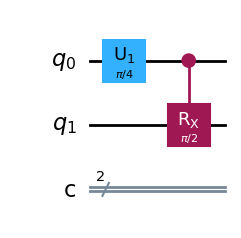

In [19]:
# Criando a versão controlada da porta minha_sx para dois qubits
def minha_csx(qubits):
    ctrl(qubits[:-1], minha_sx)(qubits[-1])


num_qubits = 2

print(np.array(lib.dump_matrix(minha_csx, num_qubits)))
lib.draw(minha_csx, num_qubits=num_qubits, output="mpl")

# Operação Inversa

Na computação quântica, todas as operações são unitárias, o que significa que são reversíveis. Isso nos permite realizar o inverso de qualquer operação quântica. No Ket, podemos usar a função `adj()` para aplicar a operação inversa de uma porta.

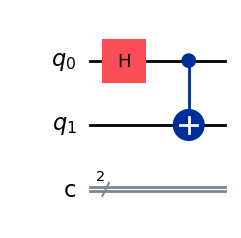

In [20]:
def bell(qubits):
    ctrl(H(qubits[0]), X)(qubits[1])


# Desenhando o circuito de Bell
lib.draw(bell, num_qubits=2, output="mpl")

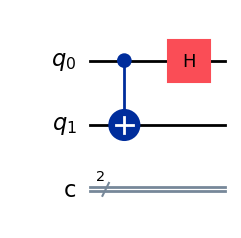

In [21]:
bell_inv = adj(bell)

# Desenhando o circuito de Bell inverso
lib.draw(bell_inv, num_qubits=2, output="mpl")

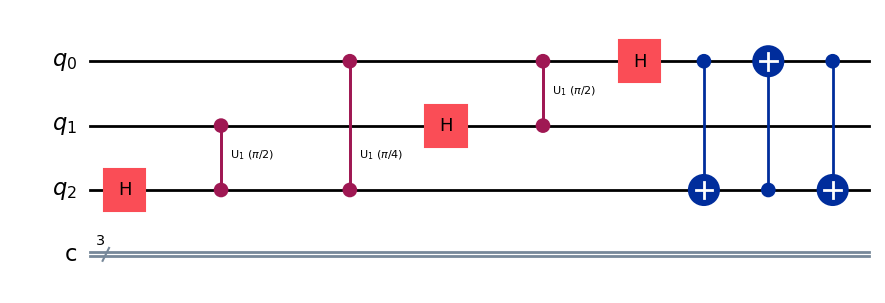

In [22]:
def qft(qubits, do_swap: bool = True):
    if len(qubits) == 1:
        H(qubits)
    else:
        *init, last = qubits
        H(last)

        for i, ctrl_qubit in enumerate(reversed(init)):
            with control(ctrl_qubit):
                PHASE(pi / 2 ** (i + 1), last)

        qft(init, do_swap=False)

    if do_swap:
        size = len(qubits)
        for i in range(size // 2):
            SWAP(qubits[i], qubits[size - i - 1])


lib.draw(qft, num_qubits=3, output="mpl")

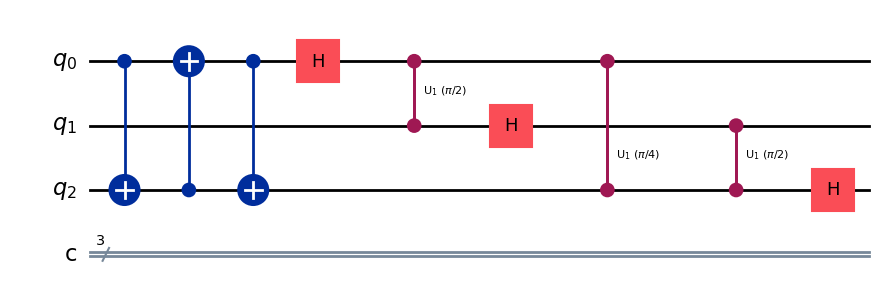

In [23]:
qft_inv = adj(qft)

lib.draw(qft_inv, num_qubits=3, output="mpl")

# Construção `with around()`

Na computação quântica, uma construção comum é "sanduichar" uma porta quântica entre duas outras, de modo que uma porta $U$ seja aplicada antes e depois de outra porta $V$, formando a operação composta $U^\dagger VU$. Esse padrão é usado para criar operações mais complexas a partir de portas quânticas básicas.

Uma aplicação dessa técnica é na implementação da porta RXX, que é amplamente utilizada em algoritmos quânticos variacionais. A RXX é uma rotação conjunta entre dois qubits ao longo do eixo X.

A seguir, implementamos duas versões da porta RXX, uma sem utilizar a construção `with around()` e outra utilizando essa contrução.

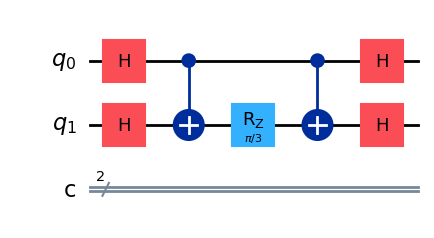

In [24]:
def minha_rxx_v1(angle: float, qubits):
    H(qubits)
    CNOT(qubits[0], qubits[1])
    RZ(angle, qubits[1])
    CNOT(qubits[0], qubits[1])
    H(qubits)


angle = pi / 3


p = Process()
qubits = p.alloc(2)
minha_rxx_v1(angle, qubits)

dump(qubits).histogram().show()
lib.draw(minha_rxx_v1, num_qubits=2, args=(angle,), output="mpl")

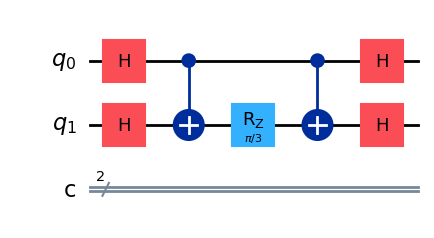

In [25]:
def minha_rxx_v2(angle: float, qubits):
    with around(cat(kron(H, H), CNOT), *qubits):
        RZ(angle, qubits[1])


angle = pi / 3


p = Process()
qubits = p.alloc(2)
minha_rxx_v2(angle, qubits)

dump(qubits).histogram().show()
lib.draw(minha_rxx_v2, num_qubits=2, args=(angle,), output="mpl")

Ambas as implementações resultam no mesmo número de portas sendo aplicadas aos qubits. No entanto, a construção `with around()` permite reduzir o número de linhas de código necessárias para expressar esse comportamento de forma mais concisa.


## Porta SWAP

Podemos construir a porta SWAP usando 3 portas CNOTs.

In [ ]:
def minha_swap_v1(qubits):
    CNOT(qubits[0], qubits[1])
    CNOT(qubits[1], qubits[0])
    CNOT(qubits[0], qubits[1])


lib.draw(minha_swap_v1, num_qubits=2, output="mpl")

In [ ]:
def minha_swap_v2(qubits):
    with around(CNOT, *qubits):
        CNOT(qubits[1], qubits[0])


lib.draw(minha_swap_v2, num_qubits=2, output="mpl")

## Porta de Fredkin

A porta de Fredkin é a versão controlada da porta SWAP. No Ket, temos a porta SWAP disponível, e podemos adicionar um qubit de controle a ela para gerar a porta de Fredkin.


Podemos implementar a porta de Fredkin usando quaner uma das portas SWAP que implementamos, Ambas as implementações resultam no mesmo comportamento final, mas a implementação usando `with around()` pode ser mais eficiente em termos de execução.

![Porta de Fredkin](https://upload.wikimedia.org/wikipedia/commons/9/98/Qcircuit_Fredkin.svg)

In [ ]:
def fredkin_v1(qubits):
    with control(qubits[0]):
        minha_swap_v1(qubits[1:3])


lib.draw(fredkin_v1, num_qubits=3, output="mpl")

In [ ]:
def fredkin_v2(qubits):
    with control(qubits[0]):
        minha_swap_v2(qubits[1:3])


lib.draw(fredkin_v2, num_qubits=3, output="mpl")

# Medidas

A medida é a única maneira de extrair informações de um programa quântico.

As operações de `dump` que usamos até agora apenas funcionam em simulação.

## Função `measure()`

A função `measure` mede uma lista de qubits e retorna um número inteiro sem sinal correspondente à bitstring medida. Essa função é essencial para obter informações sobre o estado quântico após a execução de operações.

In [ ]:
p = Process()
qubits = p.alloc(2)

# Aplicando a porta Hadamard nos qubits
H(qubits)

# Visualizando o estado dos qubits antes da medição
dump(qubits).histogram(title="Antes da medida").show()
display(dump(qubits).show(mode="latex"))

# Medindo o estado do primeiro qubit
resultado = measure(qubits[0])
print(resultado.get())

# Visualizando o estado dos qubits após a medição
dump(qubits).histogram(title="Depois da medida").show()
display(dump(qubits).show(mode="latex"))

In [ ]:
p = Process()
qubits = p.alloc(2)

# Prepara o estado de Bell
ctrl(H(qubits[0]), X)(qubits[1])

# Visualizando o estado dos qubits antes da medição
dump(qubits).histogram(title="Antes da medida").show()
display(dump(qubits).show(mode="latex"))

# Medindo o estado do primeiro qubit
resultado = measure(qubits[0])
print(resultado.get())

# Visualizando o estado dos qubits após a medição
dump(qubits).histogram(title="Depois da medida").show()
display(dump(qubits).show(mode="latex"))

## Teleporte Quântico

O teleporte quântico é um protocolo que permite a transferência de informações quânticas de um qubit para outro, sem que o qubit original precise ser fisicamente movido. Isso é alcançado utilizando um canal quântico (que envolve qubits emaranhados) e dois canais clássicos para comunicação.

O processo pode ser visualizado como uma interação entre duas partes: Alice, que possui o qubit a ser teleportado, e Bob, que receberá o qubit teleportado. Para realizar o teleporte quântico, um estado de Bell é inicialmente compartilhado entre Alice e Bob. Um dos estados de Bell mais comuns é dado por:

$$\left| \Phi^+ \right\rangle = \frac{1}{\sqrt{2}} \left( \left|00\right\rangle + \left|11\right\rangle \right)$$

Nesse estado, os qubits de Alice e Bob estão emaranhados, permitindo a transferência da informação de Alice para Bob. O protocolo envolve medições e a transmissão de resultados clássicos, permitindo que Bob recupere o estado original de Alice.

<img src="https://upload.wikimedia.org/wikipedia/commons/d/dc/Quantum_teleportation_circuit.svg" alt="teleporte" width="500"/>

### Exercício

Implemente o protocolo de teleporte quântico usando Ket. Sua implementação deve incluir os seguintes passos:

1. Preparação do Estado de Bell: Alocar os qubits necessários e preparar o estado de Bell compartilhado entre Alice e Bob.
2. Aplicação de Portas Quânticas: Realizar as operações quânticas necessárias para entrelaçar o qubit que será teleportado com o estado de Bell.
3. Medição: Medir os qubits de Alices.
4. Correção: Enviar os resultados das medições para Bob e aplicar as correções necessárias em seu qubit para recuperar o estado original.

In [ ]:
# Implemente o exercício aqui.

## Amostragem

Em muitos algoritmos quânticos, o resultado não se resume a uma única medição, mas sim a uma sequência de medições que ajudam a construir uma distribuição de probabilidade dos possíveis estados quânticos. Para facilitar esse processo, a biblioteca Ket oferece a função `sample()`, que mede uma lista de qubits várias vezes, permitindo coletar amostras representativas do estado quântico.

In [ ]:
p = Process()
qubits = p.alloc(2)

# Aplicação da porta Hadamard nos qubits para criar superposição
H(qubits)

# Coleta de amostras dos qubits
result = sample(qubits, shots=1000)

# Impressão dos resultados das medições
print(result.get())

# Exibição do histograma dos resultados medidos
result.histogram()

In [ ]:
p = Process()
qubits = p.alloc(2)
ctrl(H(qubits[0]), X)(qubits[1])

result = sample(qubits)

print(result.get())
result.histogram()

### QAOA - Max-Cut

O **Quantum Approximate Optimization Algorithm (QAOA)** é um algoritmo quântico variacional que combina técnicas clássicas e quânticas para resolver problemas de otimização. O QAOA é especialmente útil para encontrar soluções aproximadas para problemas NP-difíceis, como o problema do **Max-Cut**.

O problema do Max-Cut consiste em dividir um grafo em duas partes, de modo que o número de arestas entre as duas partes seja maximizado. Este problema pode ser visualizado como a busca por uma partição de um conjunto de vértices que maximize as conexões entre os dois subconjuntos.

![Max-Cut](https://pennylane.ai/_images/qaoa_maxcut_partition.png)

**Funcionamento do QAOA**

1. **Inicialização**: O algoritmo começa com um estado de superposição uniforme.
2. **Operações Quânticas**: O algoritmo aplica um conjunto de operações quânticas que correspondem à estrutura do grafo.
3. **Medidas**: Após as operações quânticas, os qubits são medidos para obter um resultado que represente uma solução candidata ao problema de Max-Cut.
4. **Otimização**: A função de custo é avaliada, e os parâmetros do circuito quântico são ajustados iterativamente para melhorar a solução.

Abaixo, um exemplo básico de como você pode implementar o QAOA para o problema do Max-Cut usando a plataforma Ket:



In [ ]:
vertices = [(0, 1), (1, 2), (2, 3), (3, 0)]


def qoao_layer(vertices, gamma, beta, qubits):
    for a, b in vertices:
        RZZ(gamma, qubits[a], qubits[b])
    RX(2 * beta, qubits)


lib.draw(qoao_layer, 4, args=(vertices, 2.351, 1.960), output="mpl")

In [ ]:
def qaoa(vertices, num_qubits, gammas, betas):
    process = Process()
    qubits = process.alloc(num_qubits)
    H(qubits)
    for gamma, beta in zip(gammas, betas):
        qoao_layer(vertices, gamma, beta, qubits)

    return qubits


def cost_func(vertices, samples):
    cost = 0
    num_qubits = len(samples.qubits)

    for state, count in samples.get().items():
        # Formata o estado como uma string binária
        state = f"{state:0{num_qubits}b}"
        for a, b in vertices:
            # Verifica se os vértices a e b estão em diferentes partes da partição
            if state[a] != state[b]:
                # Incrementa o custo pela contagem do estado
                cost += count

    return cost / samples.shots  # Retorna o custo médio


def minimize_qaoa(vertices, num_qubits, num_layers, shots):
    def objective(params):
        gammas = params[:num_layers]
        betas = params[num_layers:]
        qubits = qaoa(vertices, num_qubits, gammas, betas)
        samples = sample(qubits, shots)
        return -cost_func(vertices, samples)

    params = [0.5 for _ in range(num_layers * 2)]
    res = minimize(objective, params, method="COBYLA")

    print(res)

    result = qaoa(vertices, num_qubits, res.x[:num_layers], res.x[num_layers:])
    return sample(result).histogram()


minimize_qaoa(vertices, num_qubits=4, num_layers=2, shots=1024)

## Cálculo de Valor Esperado

Ket permite calcular o valor esperado de Hamiltonianos formados por operadores de Pauli, o que é fundamental para diversas aplicações em computação quântica. O valor esperado de um operador $O$ em um estado quântico $|\psi\rangle$ é dado pela expressão:

$$
\left< O \right> = \left< \psi | O | \psi \right>
$$

Essa fórmula fornece uma medida da expectativa de um resultado de uma medição associada ao operador $ O $ quando o sistema está no estado $\left|\psi\right>$.


Podemos usar o valor esperado dos operadores de Pauli $ X $, $ Y $ e $ Z $ de um qubit para calcular sua posição na esfera de Bloch. A relação entre os valores esperados e as coordenadas na esfera de Bloch é dada por:

- $ x = \langle X \rangle $
- $ y = \langle Y \rangle $
- $ z = \langle Z \rangle $

Essas coordenadas nos permitem visualizar a posição do qubit na esfera de Bloch.

In [ ]:
process = Process()
qubit = process.alloc()

# Aplicação de rotações para definir o estado do qubit
RX(-pi / 5, qubit)
RZ(-pi / 5, qubit)

# Visualização do estado do qubit na esfera de Bloch
dump(qubit).sphere().show()

# Define os operadores
x = Pauli.x(qubit)
y = Pauli.y(qubit)
z = Pauli.z(qubit)

# Cálculo dos valores esperados
exp_x = exp_value(x).get()
exp_y = exp_value(y).get()
exp_z = exp_value(z).get()

# Cálculo da posição na esfera de Bloch
print(f"Posição na esfera de Bloch: ({exp_x}, {exp_y}, {exp_z})")

### Desigualdade de Bell

A desigualdade de Bell é um conceito fundamental na mecânica quântica que permite testar a natureza do entrelaçamento quântico. Ela é baseada em uma série de experimentos que demonstram que a mecânica quântica pode prever resultados que não podem ser explicados por teorias clássicas de variáveis ocultas.

O cálculo da desigualdade é feito através de uma série de medições que podem ser expressas pelo cálculo do valor esperado:

$$
\left< A_0 B_0 \right> + \left< A_0 B_1 \right> + \left< A_1 B_0 \right> - \left< A_1 B_1 \right> = 2\sqrt{2}
$$

Para o estado:

$$
\left|\psi\right> = \frac{\left|01\right> - \left|10\right>}{\sqrt{2}}
$$

Onde:
$$
\begin{aligned}
A_0 &= Z\\
A_1 &= X\\
B_0 &= -\frac{X + Z}{\sqrt{2}}\\
B_1 &= \frac{X - Z}{\sqrt{2}}
\end{aligned}
$$

Usando a biblioteca Ket, podemos expressar esse cálculo da seguinte forma:


In [ ]:
process = Process()
a, b = process.alloc(2)

X(a + b)
CNOT(H(a), b)

# Exibindo o estado atual dos qubits
display(dump(a + b).show(mode="latex"))

# Definindo os operadores para calcular a desigualdade de Bell
a0 = Pauli.z(a)
a1 = Pauli.x(a)
b0 = -(Pauli.x(b) + Pauli.z(b)) / sqrt(2)
b1 = (Pauli.x(b) - Pauli.z(b)) / sqrt(2)


# Calculando o valor esperado da desigualdade de Bell
resultado = exp_value(a0 * b0 + a0 * b1 + a1 * b0 - a1 * b1).get()
print("Valor esperado da desigualdade de Bell:", resultado)

### Max-Cut Falqon

Falqon é um algoritmo variacional que se destaca por dispensar a necessidade de um otimizador clássico. Em vez disso, o algoritmo executa iterações, adicionando um novo parâmetro $\beta$ a cada execução.

![Falqon Algorithm](https://pennylane.ai/_images/falqon.png)

**Cálculo do Parâmetro $\beta$**

Para aplicar o Falqon ao problema do Max-Cut, o cálculo do parâmetro $\beta$ é fundamental. Ele é definido como o valor esperado do comutador entre o Hamiltoniano de mistura $H_d$ e o Hamiltoniano de custo $H_c$. A expressão é dada por:

$$
\begin{aligned}
\beta &= \left<i[H_d,\, H_c]\right>\\
& = \left<i\left[\sum_{a, b\,\in\, \mathcal{V}}\frac{1}{2}(1-Z_aZ_b),\, X^{\otimes n} \right] \right>\\
& = \left<\sum_{a, b\, \in\, \mathcal{V}}Y_aZ_b+Z_aY_b\right>
\end{aligned}
$$

In [ ]:
def falqon_layers(vertices, delta_t, betas, qubits):
    for beta in betas:
        for a, b in vertices:
            RZZ(delta_t, qubits[a], qubits[b])
        RX(delta_t * -beta, qubits)


lib.draw(falqon_layers, 4, args=(vertices, 0.1, [0.0, 1.53]), output="mpl")

In [ ]:
def beta_h(vertices, qubits):
    h0 = sum(Pauli.y(qubits[a]) * Pauli.z(qubits[b]) for a, b in vertices)
    h1 = sum(Pauli.z(qubits[a]) * Pauli.y(qubits[b]) for a, b in vertices)

    return h0 + h1


vertices = [(0, 1), (1, 2), (2, 3), (3, 0)]

process = Process()
qubits = process.alloc(4)
h = beta_h(vertices, qubits)
print(h)

In [ ]:
def falqon(vertices, delta_t, num_qubits, num_layers):
    betas = [0.0]  # Lista para armazenar os valores de beta ao longo das iterações
    cost = []  # Lista para armazenar os custos

    for _ in range(num_layers):
        process = Process(execution="batch")
        qubits = process.alloc(num_qubits)

        H(qubits)  # Inicializa os qubits no estado de superposição
        falqon_layers(vertices, delta_t, betas, qubits)  # Aplica as camadas de Falqon

        # Calcula o novo valor de beta e armazena o custo
        new_beta = exp_value(
            beta_h(vertices, qubits)
        )  # Cálculo do valor esperado do beta
        cost.append(
            -cost_func(vertices, sample(qubits, 2048))
        )  # Adiciona custo à lista
        betas.append(new_beta.get())  # Adiciona novo beta à lista

    # Segunda parte da execução para mostrar os resultados finais
    process = Process()  # Novo processo quântico
    qubits = process.alloc(num_qubits)
    H(qubits)  # Inicializa os qubits novamente
    falqon_layers(vertices, delta_t, betas, qubits)  # Aplica as camadas do Falqon
    sample(qubits).histogram().show()

    # Gráficos de custo e beta
    px.line(x=list(range(len(cost))), y=cost, title="Custo").show()
    px.line(x=list(range(len(betas))), y=betas, title="Beta").show()


falqon(vertices, delta_t=0.1, num_qubits=4, num_layers=10)

### Otimizando FALQON com Execução Dinâmica

A execução dinâmica é uma abordagem que permite realizar medidas durante a execução do código quântico. Essa técnica possibilita a obtenção de resultados intermediários, uma vez que operações como `sample()` e o cálculo de valor esperado não colapsam o estado quântico. Assim, é possível extrair informações em diferentes etapas do circuito, o que pode ser particularmente útil para a otimização do algoritmo variacional FALQON.

Entretanto, é importante notar que esse comportamento de execução dinâmica só é permitido em simulações quânticas. Em computadores quânticos reais, essa capacidade é desabilitada, devido às limitações inerentes à natureza da computação quântica.



In [ ]:
def exp_cost(vertices, qubits):
    return sum(Pauli.z(qubits[a]) * Pauli.z(qubits[b]) for a, b in vertices)


def falqon_layer(vertices, delta_t, beta, qubits):
    for a, b in vertices:
        RZZ(delta_t, qubits[a], qubits[b])
    RX(delta_t * -beta, qubits)


def falqon_v2(vertices, delta_t, num_qubits, num_layers):
    betas = [0.0]
    cost = []

    # Cria um novo processo de execução dinâmica
    process = Process(execution="live")
    qubits = process.alloc(num_qubits)
    H(qubits)

    for _ in range(num_layers):
        # Aplica uma camada do FALQON
        falqon_layer(vertices, delta_t, betas[-1], qubits)

        cost.append(exp_value(exp_cost(vertices, qubits)).get())
        betas.append(exp_value(beta_h(vertices, qubits)).get())

    dump(qubits).histogram().show()

    # Gráficos de custo e beta
    px.line(x=list(range(len(cost))), y=cost, title="Custo").show()
    px.line(x=list(range(len(betas))), y=betas, title="Beta").show()


falqon_v2(vertices, delta_t=0.1, num_qubits=4, num_layers=10)

# Simuladores do KBW

O KBW é uma parte fundamental da plataforma de programação quântica Ket, oferecendo três simuladores distintos para diferentes necessidades e cenários de simulação:

1. Sparse: Este é o simulador padrão do KBW. Ele utiliza um hash map para representar estados quânticos, o que é particularmente útil para simulações que envolvem um grande número de qubits. O tempo de computação cresce com o número de estados da base computacional em superposição.
2. Dense: Este simulador utiliza um vetor de estados completo para representar o sistema quântico. Tem um ótimo desempenho multithread. O tempo de simulação cresce exponencialmente com o número de qubits, tornando-o impraticável para simulações de sistemas muito grandes.
3. Dense v2: Semelhante ao simulador Dense, mas com uma redução de uso de memória pela metade. Ele melhora a eficiência e a velocidade em comparação com o Dense para um a simulação de um número pequeno de qubits.


A escolha do simulador a ser utilizado depende do estado quântico sendo simulado e dos recursos disponíveis.

## Benchmarks

#### Preparação do Estado GHZ

O estado GHZ de $n$ qubits é definido como:

$$
\left| \text{GHZ} \right\rangle = \frac{1}{\sqrt{2}} \left( \left| 0 \right\rangle^{\otimes n} + \left| 1 \right\rangle^{\otimes n} \right)
$$

Para preparar este estado, precisamos aplicar uma porta Hadamard no primeiro qubit e, em seguida, aplicar portas CNOT entre o primeiro qubit e todos os outros qubits.


In [ ]:
from time import time


def timeit(func):
    def wrapper(*args, **kwargs):
        n = kwargs.pop("repeat", 1)
        total = 0.0
        for _ in range(n):
            start = time()
            func(*args, **kwargs)
            end = time()
            total += end - start
        return total / n

    return wrapper

In [ ]:
@timeit
def ghz(simulador, num_qubits):
    process = Process(
        simulator=simulador,
        num_qubits=num_qubits,
        execution="batch",
    )
    qubits = process.alloc(num_qubits)
    ctrl(H(qubits[0]), X)(qubits[1:])
    result = measure(qubits).get()

    assert result == 0 or result == 2**num_qubits - 1


ghz_data = {
    "N# Qubits": [],
    "Time (s)": [],
    "Simulator": [],
}

for num_qubits in range(3, 19):
    for simulator in ["dense", "dense v2", "sparse"]:
        ghz_data["N# Qubits"].append(num_qubits)
        ghz_data["Simulator"].append(simulator)
        ghz_data["Time (s)"].append(ghz(simulator, num_qubits, repeat=10))

px.line(
    ghz_data,
    x="N# Qubits",
    y="Time (s)",
    color="Simulator",
    markers=True,
    title="GHZ",
)

### Algoritmo Quântico de Busca (Algoritmo de Grover)

O algoritmo de Grover é uma técnica quântica que permite realizar buscas em listas não ordenadas de forma mais eficiente do que os métodos clássicos. Enquanto uma busca clássica exige um tempo linear  $O(N)$ para encontrar um item específico em uma lista de $N = 2^n$ elementos, o algoritmo de Grover reduz esse tempo para $O(\sqrt{N})$.

![Circuito do Algoritmo de Grover](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/Grover%27s_algorithm_circuit.svg/1000px-Grover%27s_algorithm_circuit.svg.png)


A operação  $U_w$, chamado de oráculo, é fundamental para o algoritmo de Grover. Ela é definida como:

$$
U_w |x\rangle =
\begin{cases}
|x\rangle & \text{se } x \neq w \\
-|x\rangle & \text{se } x = w
\end{cases}
$$

Isso significa que $U_w$ inverte o sinal do estado $\left|w\right>$ (o estado que estamos buscando) enquanto mantém todos os outros estados inalterados. Essa operação é essencial para amplificar a amplitude do estado desejado ao longo das iterações do algoritmo.

O algoritmo de Grover pode ser dividido em quatro etapas principais:
1. Preparação do Estado Inicial: Todos os qubits são inicializados em um estado superposto igual. Para $n$ qubits, isso é feito aplicando uma porta Hadamard em cada qubit.
2. Aplicação do Oráculo  $U_w$: A operação $U_w$ é aplicada para inverter o sinal do estado que estamos procurando.
3. Amplificação da Amplitude: Após aplicar $U_w$, uma operação de reflexão sobre a média é aplicada. Isso amplifica a amplitude do estado $|w\rangle$ enquanto diminui a amplitude dos outros estados.
4. Medida: Finalmente, os qubits são medidos para verificar qual estado foi encontrado.


In [ ]:
def grover(qubits, oracle):
    # Inicializa o estado superposto aplicando a porta Hadamard em todos os qubits
    H(qubits)

    # Calcula o número de iterações necessárias para o algoritmo de Grover
    steps = pi / 4 * sqrt(2 ** len(qubits))

    # Executa as iterações do algoritmo de Grover
    for _ in range(int(steps)):
        # Aplica o oracle, que marca o estado desejado
        oracle(qubits)

        # Realiza a reflexão sobre a média
        # A construção 'around' aplica as portas H e X em todos os qubits
        with around(cat(H, X), qubits):
            # Aplica a porta Z ao último qubit
            # usando os qubits anteriores como controle
            ctrl(qubits[:-1], Z)(qubits[-1])

In [ ]:
@timeit
def grover_3(simulator, num_qubits):
    process = Process(
        simulator=simulator,
        num_qubits=num_qubits,
        execution="batch",
    )
    qubits = process.alloc(num_qubits)
    grover(qubits, lib.phase_oracle(3))
    measure(qubits).get()


grover_data = {
    "N# Qubits": [],
    "Time (s)": [],
    "Simulator": [],
}

for num_qubits in range(5, 13):
    for simulator in ["dense", "dense v2", "sparse"]:
        grover_data["N# Qubits"].append(num_qubits)
        grover_data["Simulator"].append(simulator)
        grover_data["Time (s)"].append(grover_3(simulator, num_qubits))

px.line(
    grover_data,
    x="N# Qubits",
    y="Time (s)",
    color="Simulator",
    log_y=True,
    markers=True,
    title="Grover",
)

# Executando nos Computadores da IBM

É possível executar uma aplicação escrita com Ket nos computadores quânticos da IBM. Para isso, é necessário configurar o alvo de execução do processo quântico.

**Capacidades de Execução**

Cada simulador e computador quântico possui capacidades diferentes, e isso deve ser considerado ao configurar as características do alvo de execução. Quando você usa um computador quântico da IBM, o processo é configurado para execução em lote (`"batch"`). Além disso, algumas capacidades que estavam disponíveis durante a simulação são desabilitadas.

|             | Válido Após | Permitido | Não Permitido |
| ----------- | ----------- | --------- | ------------- |
| `measure`   |             | ✔️         |               |
| `sample`    |             | ✔️         |               |
| `exp_value` |             | ✔️         |               |
| `dump`      |             |           | ❌             |


**Obtenção de Acesso**

Para começar a usar os computadores quânticos da IBM, você deve se cadastrar para obter sua chave de acesso. Siga os passos abaixo:

1. Acesse https://quantum.ibm.com e crie uma conta.
2. Após o cadastro, você deve copiar sua chave de acesso que permitirá a execução de seus algoritmos quânticos em dispositivos da IBM.

In [ ]:
from ket.ibm import IBMDevice
from qiskit_aer import AerSimulator

backend = AerSimulator()
device = IBMDevice(backend, num_qubits=2)

process = Process(device.configure())
a, b = process.alloc(2)

X(a + b)
CNOT(H(a), b)

a0b0 = Pauli.z(a) * -((Pauli.x(b) + Pauli.z(b)) / sqrt(2))
a0b1 = Pauli.z(a) * ((Pauli.x(b) - Pauli.z(b)) / sqrt(2))
a1b0 = Pauli.x(a) * -((Pauli.x(b) + Pauli.z(b)) / sqrt(2))
a1b1 = Pauli.x(a) * ((Pauli.x(b) - Pauli.z(b)) / sqrt(2))

print(exp_value(a0b0 + a0b1 + a1b0 - a1b1).get())

In [ ]:
# Cole o código copiado da página da IBM com sua chave

In [ ]:
from ket.ibm import IBMDevice

# Seleciona o backend menos ocupado
backend = service.least_busy()

# Cria uma instância do dispositivo IBM Quantum com o backend escolhido
device = IBMDevice(backend)

In [ ]:
process = Process(device.configure())
a, b = process.alloc(2)
CNOT(H(a), b)

sample(a + b).histogram()